# idx, rec 파일을 살펴보자
- https://github.com/deepinsight/insightface/issues/121

In [1]:
from mxnet import recordio
import mxnet as mx
import matplotlib.pyplot as plt
import os
import pandas as pd

## 1. idx 파일

In [4]:
path_imgidx = '../data/small_vgg/small_vgg_112x112.idx'

with open(path_imgidx, 'r') as f:
    idx = f.read()

In [17]:
data = pd.read_csv(path_imgidx,sep = '\t',
                   names = ['idx', 'num'])

In [18]:
data

,idx,num
0,1,0
1,2,5700
2,3,12648
3,4,19940
4,5,27800
...,...,...
294,295,1925788
295,0,1931784
296,296,1931824
297,297,1931864


In [15]:
# path_imgidx = 'D:/code/DeepLearning/Face/InsightFace/insightface/datasets/faces_ms1m_112x112/train.idx'
# path_imgrec = 'D:/code/DeepLearning/Face/InsightFace/insightface/datasets/faces_ms1m_112x112/train.rec'
path_imgidx = '../data/small_vgg/small_vgg_112x112.idx'
path_imgrec = '../data/small_vgg/small_vgg_112x112.rec'
print(os.path.isfile(path_imgidx))
print(os.path.isfile(path_imgrec))

True
True


In [16]:
imgrec = recordio.MXIndexedRecordIO(path_imgidx, path_imgrec, 'r')

In [17]:
imgrec.read_idx(idx = 1)

b'\x02\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80?\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x00p\x00p\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16

# header 정보
> label
- [label, item.aligned]

> flag
- .lst file에 align 되었는지, bounding box가 있는지 등의 여부에 따른 값..
- 이 데이터 셋은 모두 같음.

> id : 이미지 index(순서대로 지정)

### label: [0,1]

HEADER(flag=2, label=array([0., 1.], dtype=float32), id=1, id2=0)
(112, 112, 3)


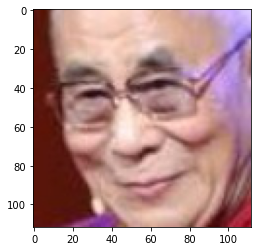

In [43]:
header, s = recordio.unpack(imgrec.read_idx(1))
print(header)
img = mx.image.imdecode(s).asnumpy() 
print(img.shape)
plt.imshow(img)

### label: [1,1]

HEADER(flag=2, label=array([1., 1.], dtype=float32), id=250, id2=0)
(112, 112, 3)


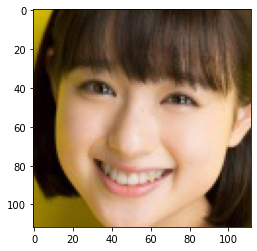

In [42]:
header, s = recordio.unpack(imgrec.read_idx(250))
print(header)
img = mx.image.imdecode(s).asnumpy() 
print(img.shape)
plt.imshow(img)

### label: [2,1]

HEADER(flag=2, label=array([2., 1.], dtype=float32), id=280, id2=0)
(112, 112, 3)


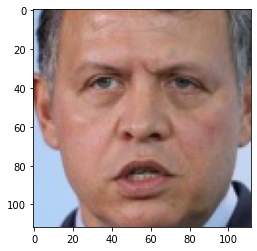

In [44]:
header, s = recordio.unpack(imgrec.read_idx(280))
print(header)
img = mx.image.imdecode(s).asnumpy() 
print(img.shape)
plt.imshow(img)

HEADER(flag=2, label=array([0., 1.], dtype=float32), id=201, id2=0)


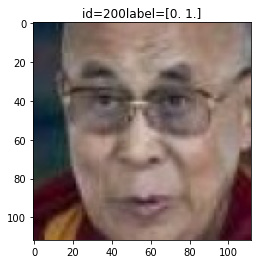

HEADER(flag=2, label=array([0., 1.], dtype=float32), id=202, id2=0)


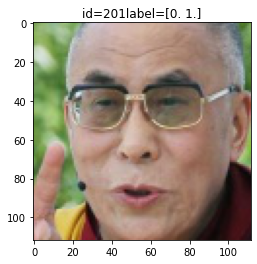

HEADER(flag=2, label=array([0., 1.], dtype=float32), id=203, id2=0)


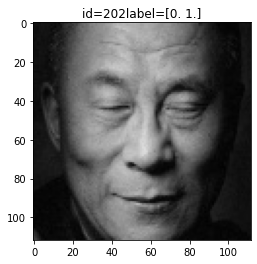

HEADER(flag=2, label=array([0., 1.], dtype=float32), id=204, id2=0)


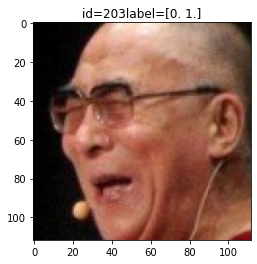

HEADER(flag=2, label=array([0., 1.], dtype=float32), id=205, id2=0)


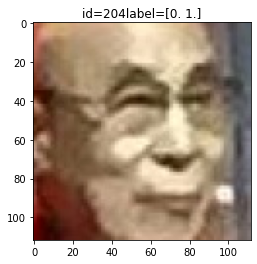

In [33]:
#%% 1 ~ 3804847
for i in range(200, 205):
    header, s = recordio.unpack(imgrec.read_idx(i+1))
    print(header)
    
    img = mx.image.imdecode(s).asnumpy() 
    plt.imshow(img)
    plt.title('id=' + str(i) + 'label=' + str(header.label))
    plt.pause(0.1)